In [330]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from scipy.stats import zscore



import warnings
warnings.filterwarnings('ignore')

In [331]:
# Using file sonar which is ALL-DATA file.
# renaming the file to csv and adding headers which are signal values from C1 to C60
# Column1 represents Label which is 'R' for rock or 'M' for metal cylinder based on the 

df=pd.read_csv('sonar.csv',names=['C1','C2','C3','C4','C5','C6','C7','C8','C9','C10','C11','C12','C13','C14','C15','C16','C17','C18','C19','C20','C21','C22','C23','C24','C25','C26','C27','C28','C29','C30','C31','C32','C33','C34','C35','C36','C37','C38','C39','C40','C41','C42','C43','C44','C45','C46','C47','C48','C49','C50','C51','C52','C53','C54','C55','C56','C57','C58','C59','C60','Label'])
df.head()


,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,...,C52,C53,C54,C55,C56,C57,C58,C59,C60,Label
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [332]:
# checking Shape
df.shape

(208, 61)

In [333]:
# checking col datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   C1      208 non-null    float64
 1   C2      208 non-null    float64
 2   C3      208 non-null    float64
 3   C4      208 non-null    float64
 4   C5      208 non-null    float64
 5   C6      208 non-null    float64
 6   C7      208 non-null    float64
 7   C8      208 non-null    float64
 8   C9      208 non-null    float64
 9   C10     208 non-null    float64
 10  C11     208 non-null    float64
 11  C12     208 non-null    float64
 12  C13     208 non-null    float64
 13  C14     208 non-null    float64
 14  C15     208 non-null    float64
 15  C16     208 non-null    float64
 16  C17     208 non-null    float64
 17  C18     208 non-null    float64
 18  C19     208 non-null    float64
 19  C20     208 non-null    float64
 20  C21     208 non-null    float64
 21  C22     208 non-null    float64
 22  C2

In [334]:
#Describe
df.describe()

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,...,C51,C52,C53,C54,C55,C56,C57,C58,C59,C60
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


Key Observations:

1. The mean is more than median(50% percentile) in all colummns.

In [335]:
# Checking for null values 
df.isnull()

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,...,C52,C53,C54,C55,C56,C57,C58,C59,C60,Label
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
204,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
205,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
206,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


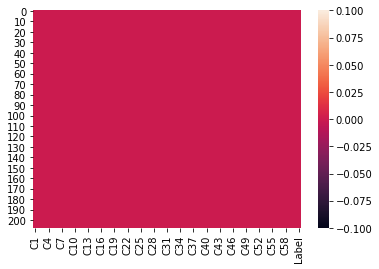

In [336]:
# Checking for null using HeatMap
sns.heatmap(df.isnull())

In [337]:
# Setting x
x=df.drop(['Label'],axis=1)
x

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,...,C51,C52,C53,C54,C55,C56,C57,C58,C59,C60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0203,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0051,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0155,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0042,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048


In [338]:
pca=PCA(n_components=10)
x=pca.fit_transform(x)

pd.DataFrame(data=x)

,0,1,2,3,4,5,6,7,8,9
0,0.576093,0.319393,-0.387291,-0.378009,-0.243780,-0.156243,-0.427736,0.074832,-0.024347,0.318054
1,-0.970667,1.018039,0.834156,0.107423,0.286070,0.178684,-0.260332,0.385600,-0.004030,-0.072529
2,-0.325887,0.874209,0.246015,0.863031,0.069110,-0.300833,-0.412807,0.075321,-0.010855,-0.438559
3,0.852035,0.690863,-0.013390,-0.110257,-0.554050,0.397968,0.492569,-0.220460,0.537003,-0.436795
4,-0.064756,0.222968,0.638601,0.140432,0.135854,0.052881,-0.386558,0.066549,-0.117006,-0.419277
...,...,...,...,...,...,...,...,...,...,...
203,0.041781,-1.031644,0.265669,0.021516,-0.015439,0.097304,0.003784,0.177926,-0.027908,-0.264179
204,0.219149,-1.153807,0.203619,0.045836,0.183272,0.012770,0.078507,0.264831,0.070749,-0.303296
205,0.297733,-1.151860,0.250096,-0.057702,0.163566,0.015275,0.045792,0.225904,0.072130,-0.313044
206,-0.045761,-0.995970,0.199677,-0.066516,-0.147227,-0.084600,0.031038,0.067444,0.025771,-0.171120


In [339]:
# Setting y
y=df.drop(df.loc[:,'C1':'C60'], axis=1)
y


,Label
0,R
1,R
2,R
3,R
4,R
...,...
203,M
204,M
205,M
206,M


In [340]:
# Setting label encoder

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

y=le.fit_transform(y)
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [341]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

In [342]:
x=scale.fit_transform(x)

In [343]:

max_acc_score=0
for r_state in range(42,101):
    train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.25,random_state=r_state)
    lg=LogisticRegression()
    lg.fit(train_x,train_y)
    pred=lg.predict(test_x)
    accuracyScore=accuracy_score(test_y,pred)
    print("Accuracy_Score corresponding to r_state: ",r_state," is ",accuracyScore)
    if(accuracyScore>max_acc_score):
        max_acc_score=accuracyScore
        final_rstate=r_state
        
print("\n\n")
print("Max_accuracy_Score corresponding to final_r_state: ",final_rstate," is ",max_acc_score)

Accuracy_Score corresponding to r_state:  42  is  0.7307692307692307
Accuracy_Score corresponding to r_state:  43  is  0.7307692307692307
Accuracy_Score corresponding to r_state:  44  is  0.7115384615384616
Accuracy_Score corresponding to r_state:  45  is  0.7884615384615384
Accuracy_Score corresponding to r_state:  46  is  0.7692307692307693
Accuracy_Score corresponding to r_state:  47  is  0.7307692307692307
Accuracy_Score corresponding to r_state:  48  is  0.7692307692307693
Accuracy_Score corresponding to r_state:  49  is  0.6538461538461539
Accuracy_Score corresponding to r_state:  50  is  0.75
Accuracy_Score corresponding to r_state:  51  is  0.75
Accuracy_Score corresponding to r_state:  52  is  0.6923076923076923
Accuracy_Score corresponding to r_state:  53  is  0.6923076923076923
Accuracy_Score corresponding to r_state:  54  is  0.7307692307692307
Accuracy_Score corresponding to r_state:  55  is  0.7692307692307693
Accuracy_Score corresponding to r_state:  56  is  0.7884615384

In [344]:
# Setting the test x & y values
# Setting the train x & y values
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.25,random_state=86)

train_x.shape

In [345]:
train_y.shape

(156,)

In [346]:
test_x.shape

(52, 10)

In [347]:
test_y.shape

(52,)

In [348]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [349]:
KNN=KNeighborsClassifier(n_neighbors=6)
SV=SVC()
LR=LogisticRegression()
DT=DecisionTreeClassifier(random_state=6)
GNB=GaussianNB()

In [350]:
models=[]
models.append(('KNeighborsClassifier',KNN))
models.append(('SVC',SV))
models.append(('LogisticRegression',LR))
models.append(('DecisionTreeClassifier',DT))
models.append(('GaussianNB',GNB))

In [351]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc

In [352]:
Model=[]
score=[]
cvs=[]
rocscore=[]

for name,model in models:
    print("--------------",name,"--------------")
    print("\n")
    Model.append(name)
    model.fit(train_x,train_y)
    print(model)
    pre=model.predict(test_x)
    AS=accuracy_score(test_y,pre)
    print("Accuracy Score: ", AS)
    score.append(AS*100)
    sc=cross_val_score(model,x,y,cv=10,scoring='accuracy').mean()
    print("Cross_Val_Score: ", sc)
    cvs.append(sc*100)
    false_positive_rate,true_positive_rate,threshold=roc_curve(test_y,pre)
    roc_auc=auc(false_positive_rate,true_positive_rate)
    print("roc_auc_score= ",roc_auc)
    rocscore.append(roc_auc*100)
    cm=confusion_matrix(test_y,pre)
    print(cm)
    print("\n\n")

-------------- KNeighborsClassifier --------------


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')
Accuracy Score:  0.7884615384615384
Cross_Val_Score:  0.6152380952380953
roc_auc_score=  0.800595238095238
[[23  1]
 [10 18]]



-------------- SVC --------------


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
Accuracy Score:  0.9038461538461539
Cross_Val_Score:  0.6488095238095237
roc_auc_score=  0.9077380952380953
[[23  1]
 [ 4 24]]



-------------- LogisticRegression --------------


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                  

In [353]:
result=pd.DataFrame({"Model": Model, "Accuracy_Score": score,"Cross_Val_Score":cvs,"ROC_Auc_Curve":rocscore})
result

,Model,Accuracy_Score,Cross_Val_Score,ROC_Auc_Curve
0,KNeighborsClassifier,78.846154,61.523810,80.059524
1,SVC,90.384615,64.880952,90.773810
2,LogisticRegression,84.615385,69.714286,84.821429
3,DecisionTreeClassifier,75.000000,56.904762,75.000000
4,GaussianNB,78.846154,61.047619,79.761905


# I choose SVC Model based on the stats above.

In [354]:
# Saving the model

from sklearn.externals import joblib
joblib.dump(lg,"lg_sonar.pkl")

['lg_sonar.pkl']